In [125]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [126]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()



Parameter estimates for the model with small features:
[-0.         -0.20529232 -0.          0.00255919]

Parameter estimates for the model with many features:
[ 0.00000000e+00 -1.77549517e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.71401824e-04
 -2.97730237e-06  4.69403184e+00]


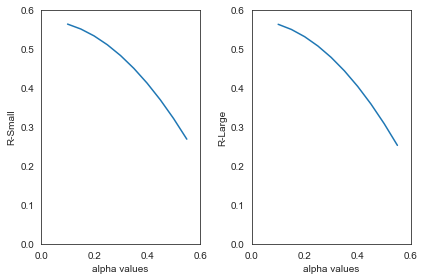

In [127]:
# Create a numpy array of alpha values ranging from 0.1 to 0.6 with intervals ar 0.05
alpha_values = np.arange(0.1, 0.6, 0.05)
a_size = len(alpha_values)

# Initialize R_small and R_large arrays same as the size of alpha_values array 
# and initialize all array values to zeros

R_small = np.zeros((a_size))
R_large = np.zeros((a_size))
origparams_small = []
origparams_large = []

# loop on alpha_values size and fit the Lasso model

for index in range(a_size):
# Small number of parameters.
    lass = linear_model.Lasso(alpha_values[index])
    lassfit = lass.fit(X_train, Y_train)
#   store in R_small as we are fitting a smaller number of parameters
    R_small[index] = lass.score(X_train, Y_train)
    origparams_small = np.append(lassfit.coef_, lassfit.intercept_)


# Large number of parameters.
    lassBig = linear_model.Lasso(alpha_values[index])
    lassBig.fit(X_train2, Y_train)
    R_large[index] = lassBig.score(X_train2, Y_train)
    origparams_large = np.append(lassBig.coef_, lassBig.intercept_)


print('\nParameter estimates for the model with small features:')
print(origparams_small)

print('\nParameter estimates for the model with many features:')
print(origparams_large)

plt.subplot(1, 2, 1)

plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.xlabel('alpha values')
plt.ylabel('R-Small')
plt.plot(alpha_values, R_small)

plt.subplot(1, 2, 2)
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.xlabel('alpha values')
plt.ylabel('R-Large')

plt.tight_layout()

plt.plot(alpha_values, R_large)

In [128]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.266410226275802
0.2467408731234633


In [129]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

alpha_values = np.arange(0.1, 0.6, 0.05)
a_size = len(alpha_values)
R_small = np.zeros((a_size))
R_large = np.zeros((a_size))

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.5738739164402877
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]
0.5739464289613365

Parameter Estimates for the same predictors for the small modeland large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]
